# Rational Approximations to GOPY
I will understand the bifurcations of the map,

\begin{align*}
    x_{n+1} &= 2 a \tanh(x_n) (b + \cos(2\pi\theta_n)) \\
    \theta_{n+1} &= \theta_n + w_k \text{ mod 1} \\
\end{align*}

where $w_k$ are rational approximations to the golden ratio.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit, njit

## Attractor plot with different initial conditions

In [4]:
@njit
def f(x,theta,a,b):
    return 2*a*np.tanh(x)*(b + np.cos(2*np.pi*theta))

In [5]:
@njit
def iterate_f(x0,theta0,a,b,w_k,num_iter):
    for ind in range(num_iter):
        x_new = f(x0,theta0,a,b)
        theta_new = (theta0 + w_k)  - np.int(theta0 + w_k)
        x0,theta0 = x_new,theta_new
    return [x_new,theta_new]

In [53]:
a = 1
b = 0
p_k,q_k = 3,5
w_k = p_k/q_k

x_vec = np.linspace(-2,2,100) 
theta_vec = np.linspace(0,1/q_k,100) 
#theta_vec = np.linspace(0,1,500) 

num_iter = 50
final_pts = []
for theta0 in theta_vec:
    for x0 in x_vec: 
        final_pt = iterate_f(x0,theta0,a,b,w_k,num_iter)
        final_pts.append(final_pt)
final_pts = np.array(final_pts)

Text(0, 0.5, '$x$')

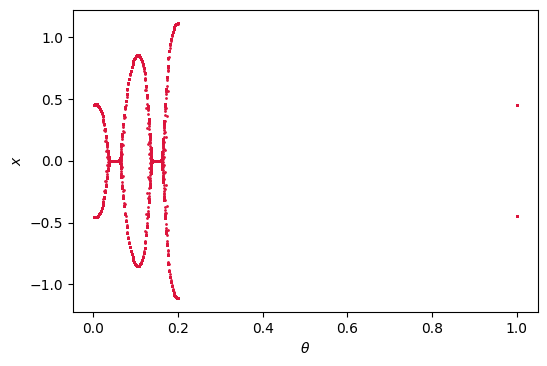

In [52]:
plt.figure(dpi=100)
plt.scatter(final_pts[:,1],final_pts[:,0],s=1,color='crimson')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$x$")